In [1]:
from gym.wrappers import TimeLimit

from environments.simulation import ARESEACheetah

initializing ocelot...


In [2]:
env = ARESEACheetah()
env = TimeLimit(env, max_episode_steps=50)
env

<TimeLimit<ARESEACheetah instance>>

In [3]:
env.observation_space

Dict(achieved_goal:Box(-1.0, 1.0, (4,), float32), desired_goal:Box(-1.0, 1.0, (4,), float32), observation:Box(-1.0, 1.0, (6,), float32))

In [4]:
env.reset()

{'observation': array([ 0.52344   , -0.51704563, -0.00706649, -0.38050133,  0.81934934,
         0.27478106]),
 'desired_goal': array([-0.9478388 , -0.48014924,  0.6480709 ,  0.64801866], dtype=float32),
 'achieved_goal': array([1.9918214 , 0.84758663, 2.8896341 , 0.10587735], dtype=float32)}

In [5]:
env.goal

array([-0.00189568, -0.0009603 ,  0.00032404,  0.00032401], dtype=float32)

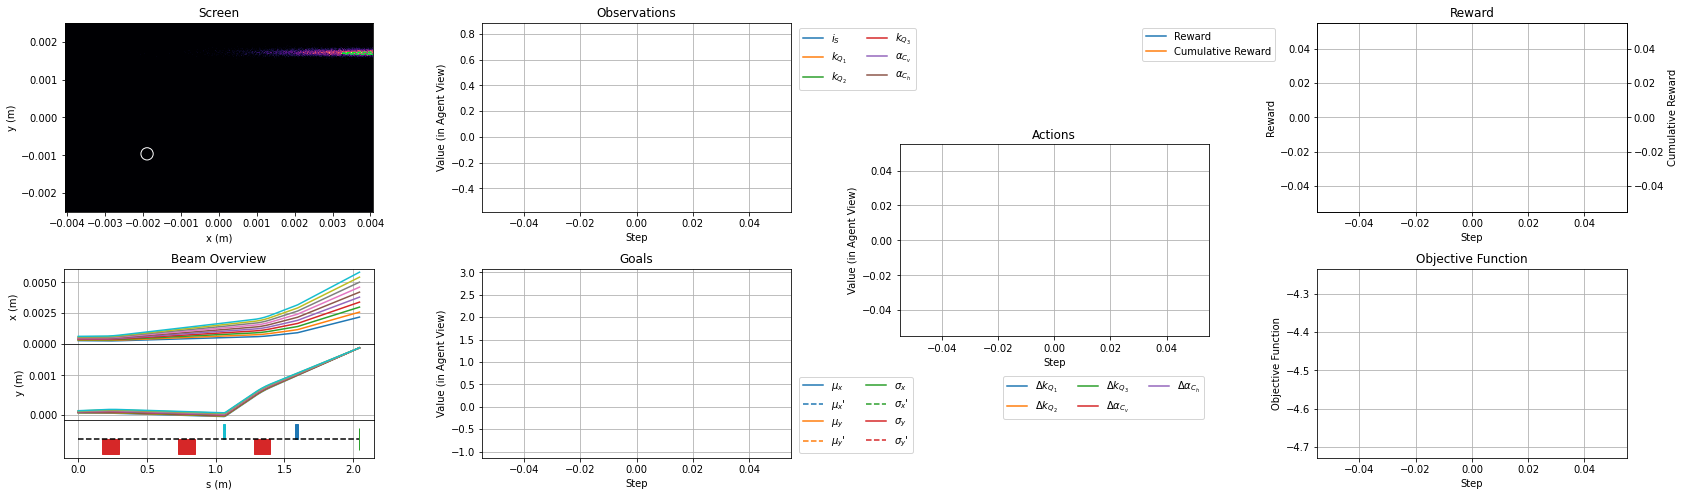

In [6]:
env.render()

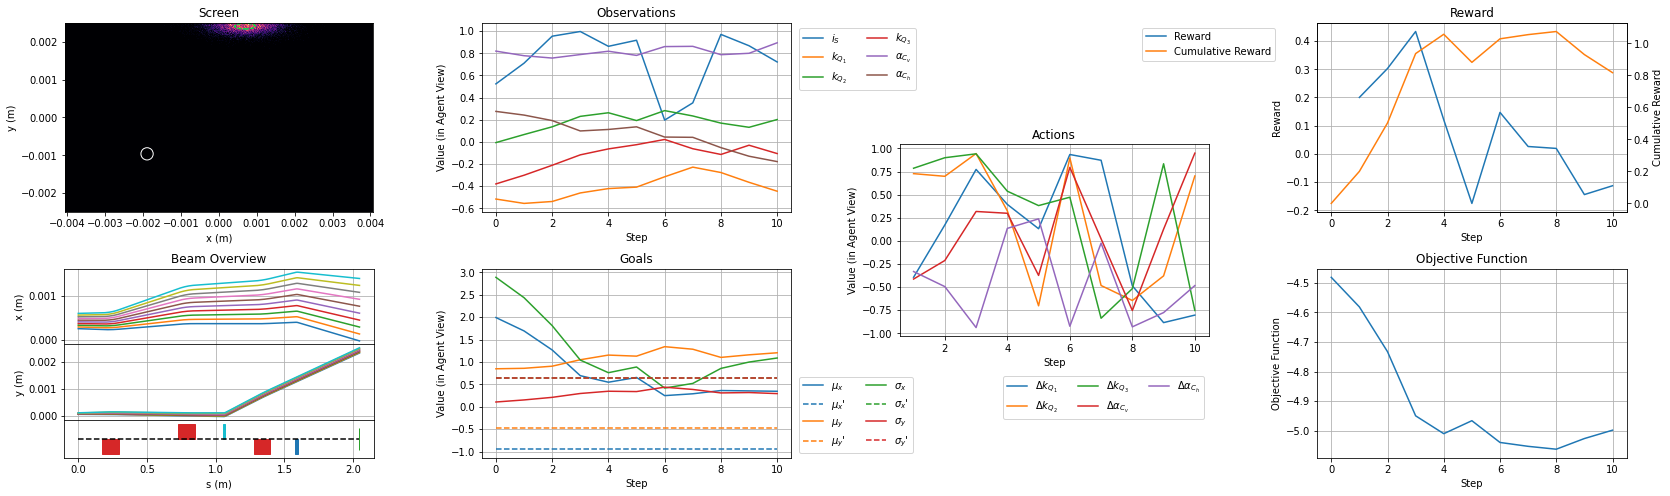

In [7]:
for _ in range(10):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    # print(f"{observation[:4]}\t{reward:.5f}\t{done}")

env.render()

In [8]:
env.reset()
env.beam_parameters

array([ 0.00034004, -0.00382499,  0.00063919,  0.00101756], dtype=float32)

In [9]:
from scipy import optimize

env = ARESEAJOSS()
# env = ScaleActuators(env, env.optimization_space.high)
env.reset()

env.render()
bounds = optimize.Bounds(
    env.accelerator_optimization_space.low,
    env.accelerator_optimization_space.high
)
x = optimize.minimize(fun=env.evaluate,
                      x0=env.initial_actuators,
                      bounds=bounds)
print(x)
env.render()

NameError: name 'ARESEAJOSS' is not defined

In [10]:
env.beam_parameters

array([-9.75054913e-05, -1.45174802e-09, -7.71380050e-04, -5.73778248e-04])

In [11]:
env.actuators

array([ 9.99999168e-01,  9.99999293e-01,  9.99999850e-01,  7.87403276e-04,
       -1.72043362e-03])

In [12]:
bounds

Bounds(array([-1., -1., -1., -1., -1.], dtype=float32), array([1., 1., 1., 1., 1.], dtype=float32))

In [13]:
env.observation_space.high

array([4.e-03, 4.e-03, 4.e-04, 4.e-04, 1.e+05, 3.e+01, 3.e+01, 3.e+01,
       3.e-03, 3.e-03], dtype=float32)